In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import yfinance as yf

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [10]:
%matplotlib inline
sns.set_theme(rc={"figure.figsize": [15,8]},
              style='dark')
sns.set_context(context='notebook')
plt.style.use('dark_background')

In [11]:
# Importando activo de yfinance
activo = 'NQ=F'
df = yf.Ticker(activo)
df = df.history(period="max")

In [12]:
# Calculate annual returns
annual_df = df['Close'].resample('YE').last()
annual_returns = annual_df.pct_change() * 100

years = annual_returns.index.year.tolist()
returns = annual_returns.values.flatten()


In [13]:
# calculate intra-years drawdowns
drawdowns = []

for year in years:
    year_data = df[df.index.year == year]['Close']
    if not year_data.empty:
        year_max = year_data.max()
        year_min = year_data.min()
        drawdown = (year_min - year_max) / year_max * 100 # convert to porcetage
        drawdowns.append(drawdown)


In [14]:
# Ensure drawdowns is a Numpy array
drawdowns = np.array(drawdowns)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


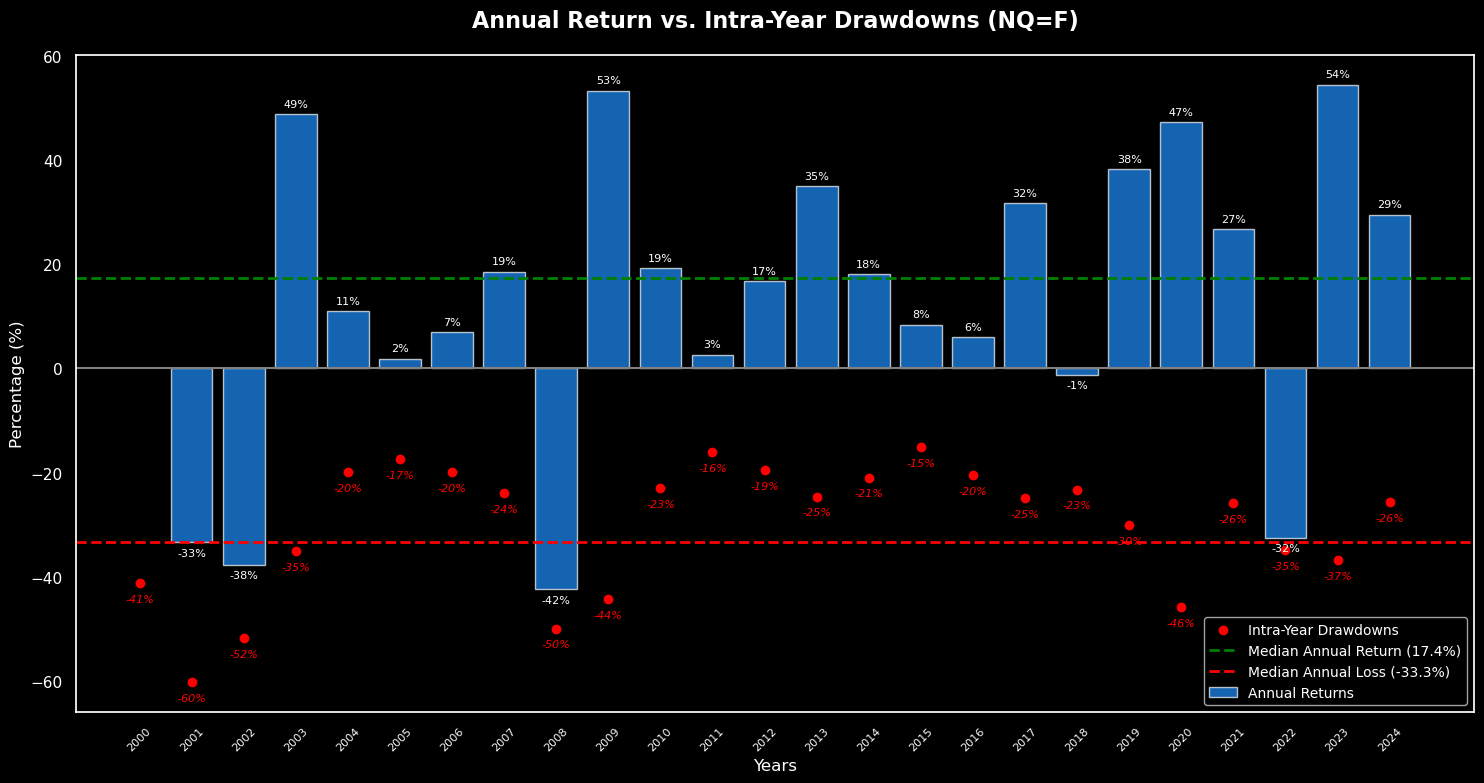

In [15]:
# Plot annual returns as bars 
plt.bar(years, returns, color='dodgerblue', alpha=0.7, width=0.8, label='Annual Returns')

# Plot drawdowns as red dots
plt.scatter(years, drawdowns, color='red', zorder=3, label='Intra-Year Drawdowns')

# Calculate and plot median return and median loss lines
median_return = np.nanmedian(returns)
median_loss = np.median([ret for ret in returns if ret < 0])

plt.axhline(y=median_return, color='green', linestyle='--', lw=2, label=f'Median Annual Return ({median_return:.1f}%)')
plt.axhline(y=median_loss, color='red', linestyle='--', lw=2, label=f'Median Annual Loss ({median_loss:.1f}%)')
plt.axhline(y=0, color='grey', linestyle='-', lw=1.5)  # Línea de cero


for year, ret, dd in zip(years, returns, drawdowns):
    # Annual return label
    plt.text(year, ret + (1 if ret > 0 else -3), f'{ret:.0f}%', 
             ha='center', va='bottom', fontsize=8)
    
    # Drawdown label
    plt.text(year, float(dd) - 4, f'{float(dd):.0f}%',
             ha='center', va='bottom', color='red', fontsize=8, style='italic')

# Adjust x-axis to show all years
plt.xticks(years, rotation=45, fontsize=8)

# Personalizar ejes y leyenda
plt.title("Annual Return vs. Intra-Year Drawdowns (NQ=F)", fontsize=16, fontweight='bold', pad=20)
plt.ylabel("Percentage (%)", fontsize=12)
plt.xlabel("Years", fontsize=12)
plt.xticks(years, rotation=45)
plt.legend(fontsize=10)

plt.savefig('annual_return_vs_drawdown.png', dpi=300, bbox_inches='tight', facecolor='black')

plt.tight_layout()
plt.show()